In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [6]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
y=df['Outcome']

In [15]:
x=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=156,stratify=y )

In [38]:
lr_model = LogisticRegression()

In [39]:
lr_model.fit(x_train,y_train)

C:\Users\BIT-R45\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = lr_model.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix,roc_curve
from sklearn.preprocessing import Binarizer

In [53]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [54]:
def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('\n임계값: ', custom_threshold)
        get_clf_eval(y_test, custom_predict)

In [55]:
get_clf_eval(y_test,y_pred)

오차행렬:
 [[88 12]
 [23 31]]

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.7270


In [56]:
thresholds=[0.4,0.45,0.5,0.55,0.6]

In [58]:
y_pred_proba1 = lr_model.predict_proba(x_test)[:,1]

In [60]:
get_eval_by_threshold(y_test,y_pred_proba1.reshape(-1,1),thresholds)


임계값:  0.4
오차행렬:
 [[77 23]
 [18 36]]

정확도: 0.7338
정밀도: 0.6102
재현율: 0.6667
F1: 0.6372
AUC: 0.7183

임계값:  0.45
오차행렬:
 [[83 17]
 [20 34]]

정확도: 0.7597
정밀도: 0.6667
재현율: 0.6296
F1: 0.6476
AUC: 0.7298

임계값:  0.5
오차행렬:
 [[88 12]
 [23 31]]

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.7270

임계값:  0.55
오차행렬:
 [[89 11]
 [27 27]]

정확도: 0.7532
정밀도: 0.7105
재현율: 0.5000
F1: 0.5870
AUC: 0.6950

임계값:  0.6
오차행렬:
 [[91  9]
 [29 25]]

정확도: 0.7532
정밀도: 0.7353
재현율: 0.4630
F1: 0.5682
AUC: 0.6865


In [61]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


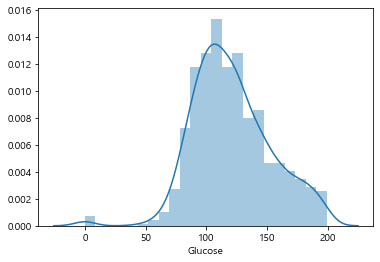

In [62]:
sns.distplot(df['Glucose'])

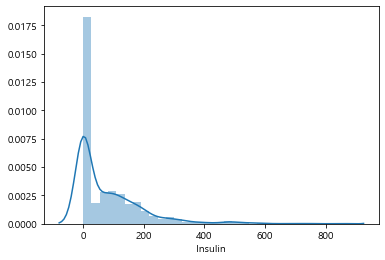

In [63]:
sns.distplot(df['Insulin'])

In [64]:
zero_features=['Glucose','BloodPressure','SkinThickness','Insulin']

In [ ]:
for i in zero_features:
    

In [68]:
df['Glucose'].count()

768

In [76]:
df[df['Glucose']==0]['Glucose'].count()/df['Glucose'].count()

0.006510416666666667

In [84]:
for i in zero_features:
    a=df[i].count()
    b=df[df[i]==0][i].count()
    print('{0}의 0건수는 {1}, 퍼센트는 {2:.2f} %'.format(i,b,b/a*100))

Glucose의 0건수는 5, 퍼센트는 0.65 %
BloodPressure의 0건수는 35, 퍼센트는 4.56 %
SkinThickness의 0건수는 227, 퍼센트는 29.56 %
Insulin의 0건수는 374, 퍼센트는 48.70 %


In [86]:
df_fill = pd.read_csv('data/diabetes_fill_insulin.csv')

In [87]:
df_fill.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [89]:
x2=df_fill[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [90]:
y2=df_fill['Outcome']

In [91]:
x2_train, x2_test, y2_train, y2_test = train_test_split(
x2, y2, test_size=0.2, random_state=156,stratify=y)

In [95]:
lr_model.fit(x2_train,y2_train)

C:\Users\BIT-R45\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
y2_pred = lr_model.predict(x2_test)

In [99]:
get_clf_eval(y2_test,y2_pred)

오차행렬:
 [[91  9]
 [21 33]]

정확도: 0.8052
정밀도: 0.7857
재현율: 0.6111
F1: 0.6875
AUC: 0.7606


In [100]:
get_clf_eval(y_test,y_pred)

오차행렬:
 [[88 12]
 [23 31]]

정확도: 0.7727
정밀도: 0.7209
재현율: 0.5741
F1: 0.6392
AUC: 0.7270


In [108]:
y2_pred_proba = lr_model.predict_proba(x2_test)[:,1]

In [109]:
thresholds2=np.arange(0.3,0.6,0.03)

In [110]:
get_eval_by_threshold(y2_test,y2_pred_proba.reshape(-1,1),thresholds2)


임계값:  0.3
오차행렬:
 [[72 28]
 [12 42]]

정확도: 0.7403
정밀도: 0.6000
재현율: 0.7778
F1: 0.6774
AUC: 0.7489

임계값:  0.32999999999999996
오차행렬:
 [[75 25]
 [14 40]]

정확도: 0.7468
정밀도: 0.6154
재현율: 0.7407
F1: 0.6723
AUC: 0.7454

임계값:  0.35999999999999993
오차행렬:
 [[80 20]
 [16 38]]

정확도: 0.7662
정밀도: 0.6552
재현율: 0.7037
F1: 0.6786
AUC: 0.7519

임계값:  0.3899999999999999
오차행렬:
 [[82 18]
 [17 37]]

정확도: 0.7727
정밀도: 0.6727
재현율: 0.6852
F1: 0.6789
AUC: 0.7526

임계값:  0.4199999999999999
오차행렬:
 [[84 16]
 [18 36]]

정확도: 0.7792
정밀도: 0.6923
재현율: 0.6667
F1: 0.6792
AUC: 0.7533

임계값:  0.44999999999999984
오차행렬:
 [[87 13]
 [19 35]]

정확도: 0.7922
정밀도: 0.7292
재현율: 0.6481
F1: 0.6863
AUC: 0.7591

임계값:  0.4799999999999998
오차행렬:
 [[90 10]
 [20 34]]

정확도: 0.8052
정밀도: 0.7727
재현율: 0.6296
F1: 0.6939
AUC: 0.7648

임계값:  0.5099999999999998
오차행렬:
 [[92  8]
 [21 33]]

정확도: 0.8117
정밀도: 0.8049
재현율: 0.6111
F1: 0.6947
AUC: 0.7656

임계값:  0.5399999999999998
오차행렬:
 [[92  8]
 [23 31]]

정확도: 0.7987
정밀도: 0.7949
재현율: 0.5741
F1: 0.6667
AUC: 0.7470

임계값

In [112]:
29/(25+29)

0.5370370370370371